## 感知机

- 给定输入$x$，权重$w$和偏移$b$，感知机输出：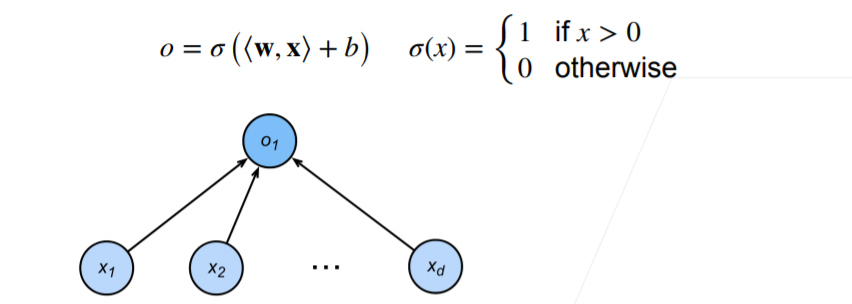

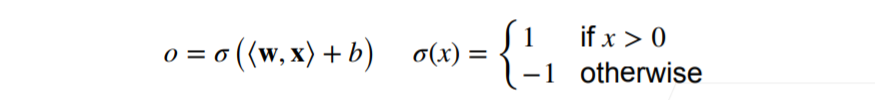

- 感知机是一个二分类问题——回归输出实数——softmax回归输出概率
- **训练感知机**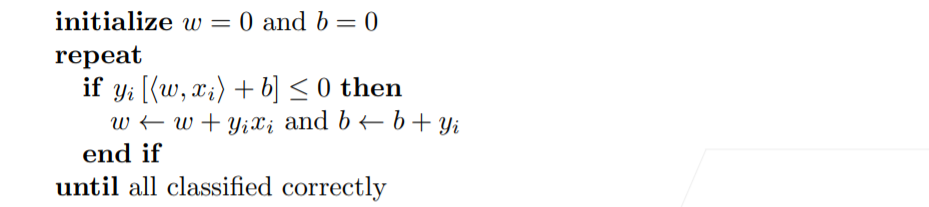
- 等价于**使用批量大小为1的梯度下降**，并使用损失函数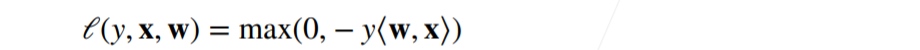
- 收敛定理：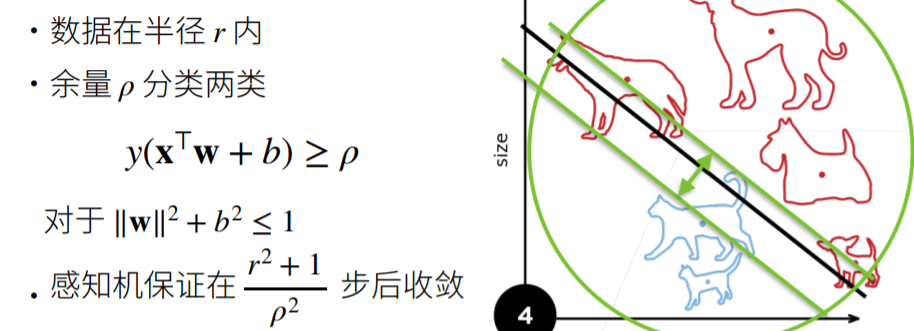

- 感知机都不能拟合XOR问题，只能产生线性分割面

#### 总结
- 感知机是一个二分类模型，是最早的AI模型之一
- 求解算法等价于使用批量大小为1的梯度下降
- 不能拟合XOR函数

## 多层感知机

- 学习**XOR**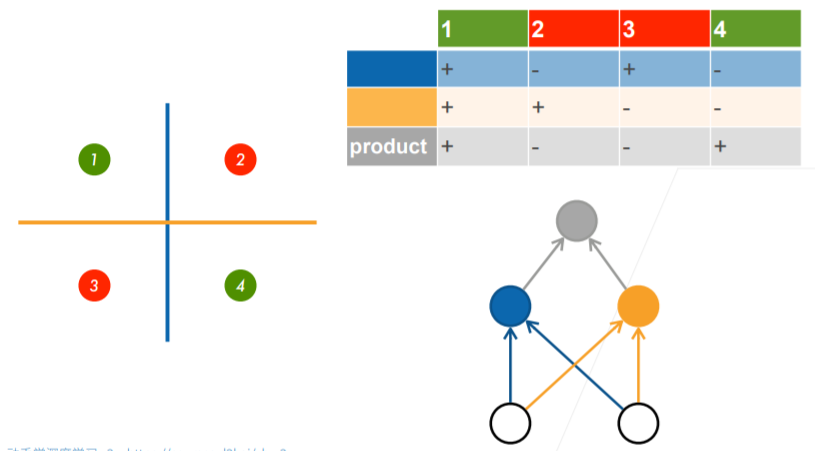

- 单隐藏层——**隐藏层大小是超参数**
- 单隐藏层-单分类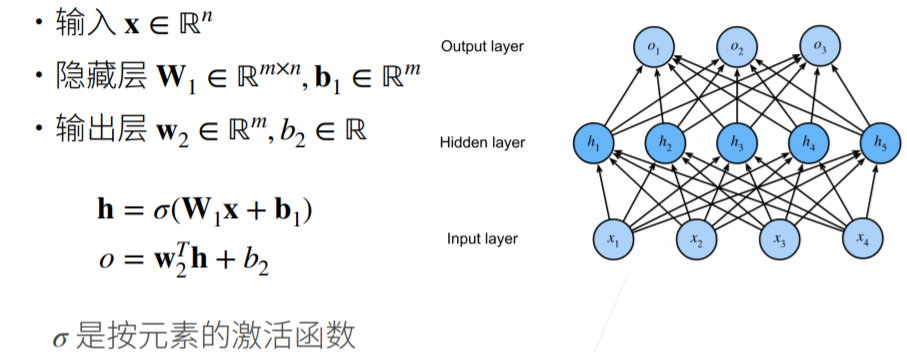

- 为什么需要**非线性激活函数**？  
如果$\sigma$是线性的函数，则最终得到的仍然是一个单层感知机（线性模型）
- **Sigmoid**激活函数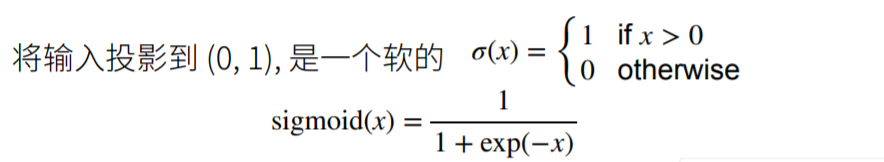
- **Tanh**激活函数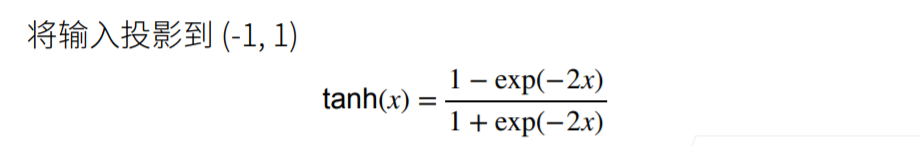
- **ReLU**激活函数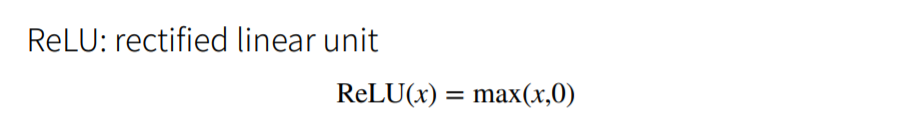


In [12]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

from d2l import torch as d2l

## ReLU激活函数
### 优点
- 求导表现很好——要么参数消失、要么让参数通过，并且减轻了神经网络中梯度消失的问题

Text(0, 0.5, 'relu(x)')

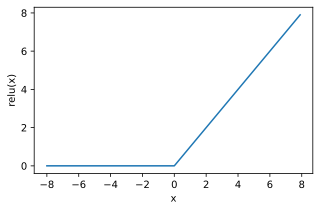

In [13]:
x = torch.arange(-8., 8., 0.1, requires_grad=True)
y = torch.relu(x)

# d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5)) d2l.plot能直接接受张量进行绘图
plt.figure(figsize=(5, 3))
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.xlabel('x')
plt.ylabel('relu(x)')

1. 使用`torch.ones_like(x)`：在执行`backward()`时，需要指定目标函数`y`对每个输出的梯度
- 当`y`是标量，pytorch会自动假设梯度为1，即默认执行链式法则
- `y`是一个张量，pytorch需要我们**指定每个输出的梯度，提供一个形状和`y`相同的梯度张量**，注意要**是`ones_like(y)`才行**，不能是`zeros_like(y)`，得到的梯度全部为0  
  
2. `retain_graph=True`的作用是**保留计算图**，以便后续仍然能执行反向传播操作
- pytorch在调用`backward()`之后，会**释放计算图**，若想再同一个计算图上执行多次反向传播，就需要用到`retain_graph=True`

Text(0, 0.5, 'grad of relu')

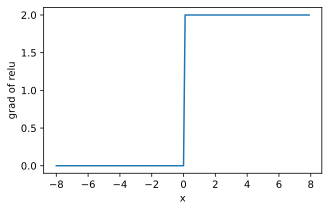

In [16]:
y.backward(torch.ones_like(x), retain_graph=True)

plt.figure(figsize=(5,3))
plt.plot(x.detach().numpy(), x.grad)
plt.xlabel('x')
plt.ylabel('grad of relu')

## sigmoid函数
- 将范围(-inf, inf)中的任意输入压缩到区间(0, 1)中

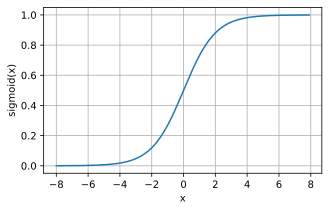

In [17]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 3))

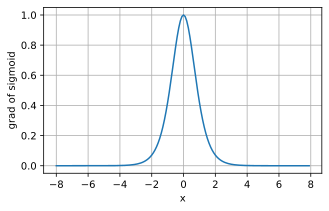

In [20]:
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 3))

### tanh函数
- 将范围(-inf, inf)中的任意输入压缩到区间(-1, 1)中

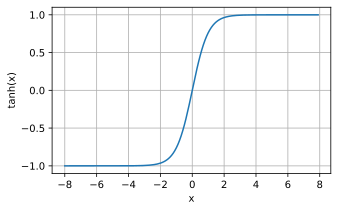

In [24]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 3))

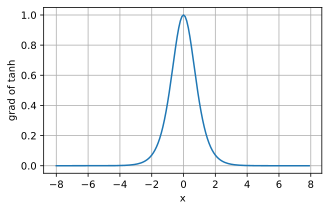

In [27]:
x.grad.zero_()
y.backward(torch.ones_like(y), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 3)) 

- **多分类问题——softmax**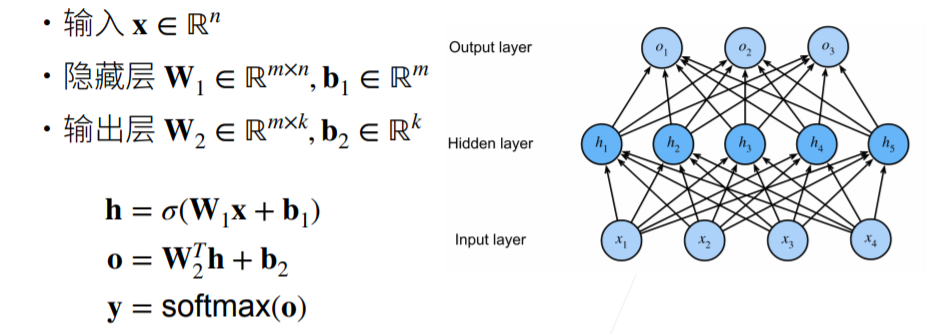  

- 有一个**softmax**操作过程——在softmax回归里加了一个**隐藏层**

- **多隐藏层**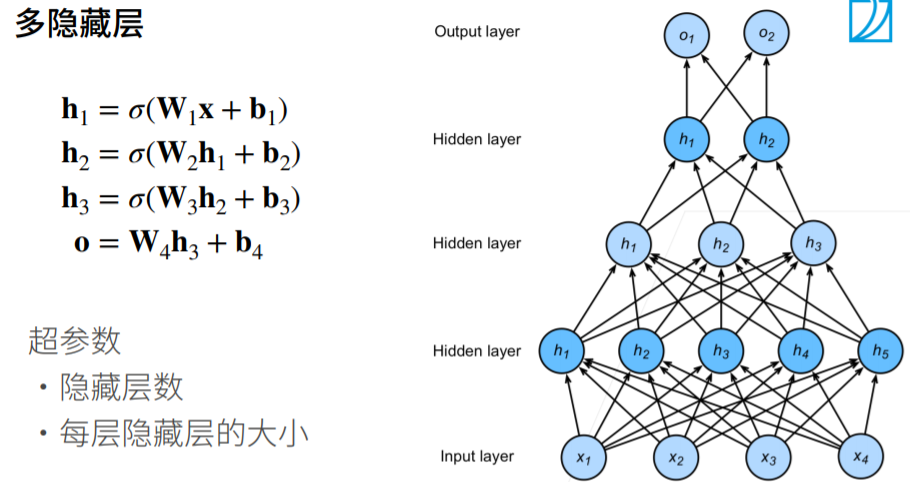
- **超参数**：隐藏层数 + 每层隐藏层的大小

### 总结
- 多层感知机使用**隐藏层**和**激活函数**来得到非线性模型
- 常用激活函数是Sigmoid，Tanh，ReLU
- 使用**softmax**来处理多类分类
- 超参数为隐藏层数和各个隐藏层大小

### 小结

* 多层感知机在输出层和输入层之间增加一个或多个**全连接隐藏层**，并通过**激活函数**转换隐藏层的输出。
* 常用的激活函数包括**ReLU**函数、**sigmoid**函数和**tanh**函数。

### 练习

1. 计算pReLU激活函数的导数。
1. 证明一个仅使用ReLU（或pReLU）的多层感知机构造了一个连续的分段线性函数。
1. 证明$\operatorname{tanh}(x) + 1 = 2 \operatorname{sigmoid}(2x)$。
1. 假设我们有一个非线性单元，将它一次应用于一个小批量的数据。这会导致什么样的问题？


### 回答
1. pReLU激活函数定义为：
$$
f(x) = 
\begin{cases} 
x, & \text{if } x > 0 \\
ax, & \text{if } x \leq 0
\end{cases}
$$
其导数为：
$$
f'(x) = 
\begin{cases} 
1, & \text{if } x > 0 \\
a, & \text{if } x \leq 0
\end{cases}
$$

2. ReLU是分段线性函数，则多个ReLU层的组合仍然是一个分段线性函数
4. **没太明白**非线性单元对每个输入独立计算输出。如果小批量中数据量很大，可能导致计算开销过大或效率低下；若批量过小，可能会导致训练不稳定或者因为批量过大而导致泛化能力下降

## 多层感知机的从0开始实现

In [28]:
import torch

from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

2.4%

100.0%


Extracting ../data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100.0%


Extracting ../data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



100.0%


Extracting ../data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100.0%

Extracting ../data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



### 初始化模型参数
- 若`*0.1`则是生成了一个**新**的张量，需要**单独**`.requires_grad_()`
- `nn.Parameter`专门来表示神经网络中的**可训练参数**，确保参数是**叶子张量**leaf tensor

In [100]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

w1 = torch.randn(num_inputs, num_hiddens) * 0.01
w1.requires_grad_()
b1 = torch.zeros(num_hiddens, requires_grad=True)

w2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = torch.zeros(num_outputs, requires_grad=True)

params = [w1, b1, w2, b2]

### 激活函数

In [94]:
def ReLU(X):
    a = torch.zeros_like(X)
    return torch.max(a, X)

### 模型
因为忽略了空间结构，所以使用`reshape`将每个二维图像转换为一个长度为`num_inputs`的向量

In [95]:
def net(X):
    X = X.reshape(-1, num_inputs)
    H = ReLU(X@w1 + b1) # 第一层，包含一个激活函数
    return H@w2 + b    # 第二层，对第一层输出做线性运算

In [101]:
num_inputs, num_outputs, num_hidden1, num_hidden2 = 784, 10, 256, 128

w1 = torch.randn(num_inputs, num_hidden1) * 0.01
w1.requires_grad_()
b1 = torch.zeros(num_hidden1, requires_grad=True)

w2 = torch.randn(num_hidden1, num_hidden2) * 0.01
w2.requires_grad_()
b2 = torch.zeros(num_hidden2, requires_grad=True)

w3 = nn.Parameter(torch.randn(num_hidden2, num_outputs, requires_grad=True) * 0.01)
b3 = torch.zeros(num_outputs, requires_grad=True)

params = [w1, b1, w2, b2, w3, b3]

In [102]:
def net(X):
    X = X.reshape(-1, num_inputs)
    H1 = ReLU(X@w1 + b1)
    H2 = ReLU(H1@w2 + b2)
    return H2@w3 + b3

### 损失函数

In [96]:
loss = nn.CrossEntropyLoss(reduction='none')

### 训练
多层感知机的训练过程**和softmax回归的训练过程完全相同**

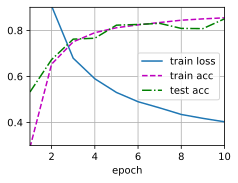

In [103]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

 以下是**有关`train_ch3`的代码**

In [75]:
from IPython import display

class Animator:  #@save
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [79]:
class Accumulator:  #@save
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [80]:
def accuracy(y_hat, y):  #@save
    """计算预测正确的数量"""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

In [81]:
def evaluate_accuracy(net, data_iter):  #@save
    """计算在指定数据集上模型的精度"""
    if isinstance(net, torch.nn.Module):
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [82]:
def train_epoch_ch3(net, train_iter, loss, updater):  #@save
    """训练模型一个迭代周期（定义见第3章）"""
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

In [83]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  #@save
    """训练模型（定义见第3章）"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

### 小结

* 手动实现一个简单的多层感知机是很容易的。然而如果有大量的层，从零开始实现多层感知机会变得很麻烦（例如，要命名和记录模型的参数）。

### 练习

1. 在所有其他参数保持不变的情况下，更改超参数`num_hiddens`的值，并查看此超参数的变化对结果有何影响。确定此超参数的最佳值。
1. 尝试添加更多的隐藏层，并查看它对结果有何影响。
1. 改变学习速率会如何影响结果？保持模型架构和其他超参数（包括轮数）不变，学习率设置为多少会带来最好的结果？
1. 通过对所有超参数（学习率、轮数、隐藏层数、每层的隐藏单元数）进行联合优化，可以得到的最佳结果是什么？
1. 描述为什么涉及多个超参数更具挑战性。
1. 如果想要构建多个超参数的搜索方法，请想出一个聪明的策略。


### 回答
1. 较大的`num_hiddens`值会增加模型的容量，提高准确率，也会增加过拟合风险，过小的值则可能会导致欠拟合
2. 增加隐藏层一般会提升模型的表现，但也可能导致训练时间变长，甚至引发梯度消失或爆炸等问题
3. 学习率太大会导致模型难以收敛，学习率太小则训练过程会非常缓慢
4. 寻找**不同超参数组合**下的最佳表现——**网格搜索**，**随机搜索**，**贝叶斯优化**
5. 超参数之间存在复杂的相互依赖关系，优化一个超参数的同时可能会对另一个超参数产生影响
6. 使用**超参数优化工具**

## 多层感知机的简洁实现
**通过高级API更简洁地实现多层感知机**

In [85]:
import torch

from torch import nn
from d2l import torch as d2l

### 模型

In [104]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 128),
                    nn.ReLU(),
                    nn.Linear(128, 10)
                   )

def init_weight(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.1)

net.apply(init_weight)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): ReLU()
  (5): Linear(in_features=128, out_features=10, bias=True)
)

- **训练过程**的实现与实现softmax回归时**完全相同**

- 这种模块化设计使得我们能够与模型架构有关的内容**独立出来**


In [105]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

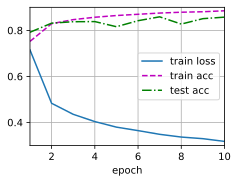

In [106]:
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 小结

* 我们可以使用高级API更简洁地实现多层感知机。
* 对于相同的分类问题，多层感知机的实现与softmax回归的实现相同，只是多层感知机的实现里增加了带有激活函数的隐藏层。

### 练习

1. 尝试添加不同数量的隐藏层（也可以修改学习率），怎么样设置效果最好？
1. 尝试不同的激活函数，哪个效果最好？
1. 尝试不同的方案来初始化权重，什么方法效果最好？

### 尝试，就是电脑太**慢**了
1. 通常，增加隐藏层会提升模型的表现，但是过多的隐藏层可能会导致过拟合、训练变慢、甚至梯度消失等问题，尤其是在小规模数据集上  
- 一般1-2层隐藏层就能满足大多数任务需求；3层以上适用于较复杂的任务
2. 常见的初始化方法：  
- Xavier初始化，用于`sigmoid`或`tanh`激活函数的网络中  
- He初始化，适合`ReLU`
- 随机初始化，从正态分布中随机取值，容易导致网络训练不稳定
- 常数初始化，通常不使用

## 策略：给一个数据——
- 先进行线性的（没有隐藏层）
- 单隐藏层，改变隐藏层的神经元个数
- 再加深神经网络，加隐藏层